# Honours Project

***
### Implementing and evaluating different machine learning algorithms to detect credit card fraud by means of anomaly detection.

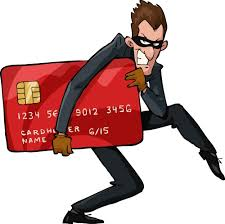

***
This project will be devided into 4 sections. 

1) Importing and visualising the raw data.

2) Pre-processing the data.

3) Implementing and evaluating the algorthims.

4) Visualising and comparing results. 


In [19]:
#Importing all neccessary libraries/packages and displaying current versions in use. 
import sys
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 18:50:55) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.14.3
Pandas: 0.23.4
Matplotlib: 2.2.2
Seaborn: 0.9.0
Scipy: 1.1.0


## Data Visualisation
-  Locating the directory of the credit card csv and reading the file. 
-  The following cells will open the data set and look at its contents. 
-  The data set has far too many rows so a small percentage will be looked at.
**NOTE**  The columns labelled v1-v28 is pre processed data so personal user data is hidden. 

`The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML
THis project drew isnispration from the dataset and users such as Rajkiran Gaddati,LCT14558, joparga3, Pavan Sanagapati `

In [20]:
#Read csv file and print all columns.  
#show what information the data set contains and number of valid & fraud.
data = pd.read_csv('C:\\Users\\alexa\\Desktop\\4th Year\\Honours\\Credit Card Fraud\\creditcardfraud\\creditcard.csv')
print(data.columns)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Fraud Cases: 492
Valid Transactions: 284315


In [21]:
# Taking a random 10% of the datasets's rows and showing the data they contain. 
#data = data.sample(frac=0.5, random_state = 42) #creates smaller workable data set.
print(data.shape)
print(data.describe())
#data doesnt make much sense at the moment. 

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

# Implement histograms to show distribution of data of all columns

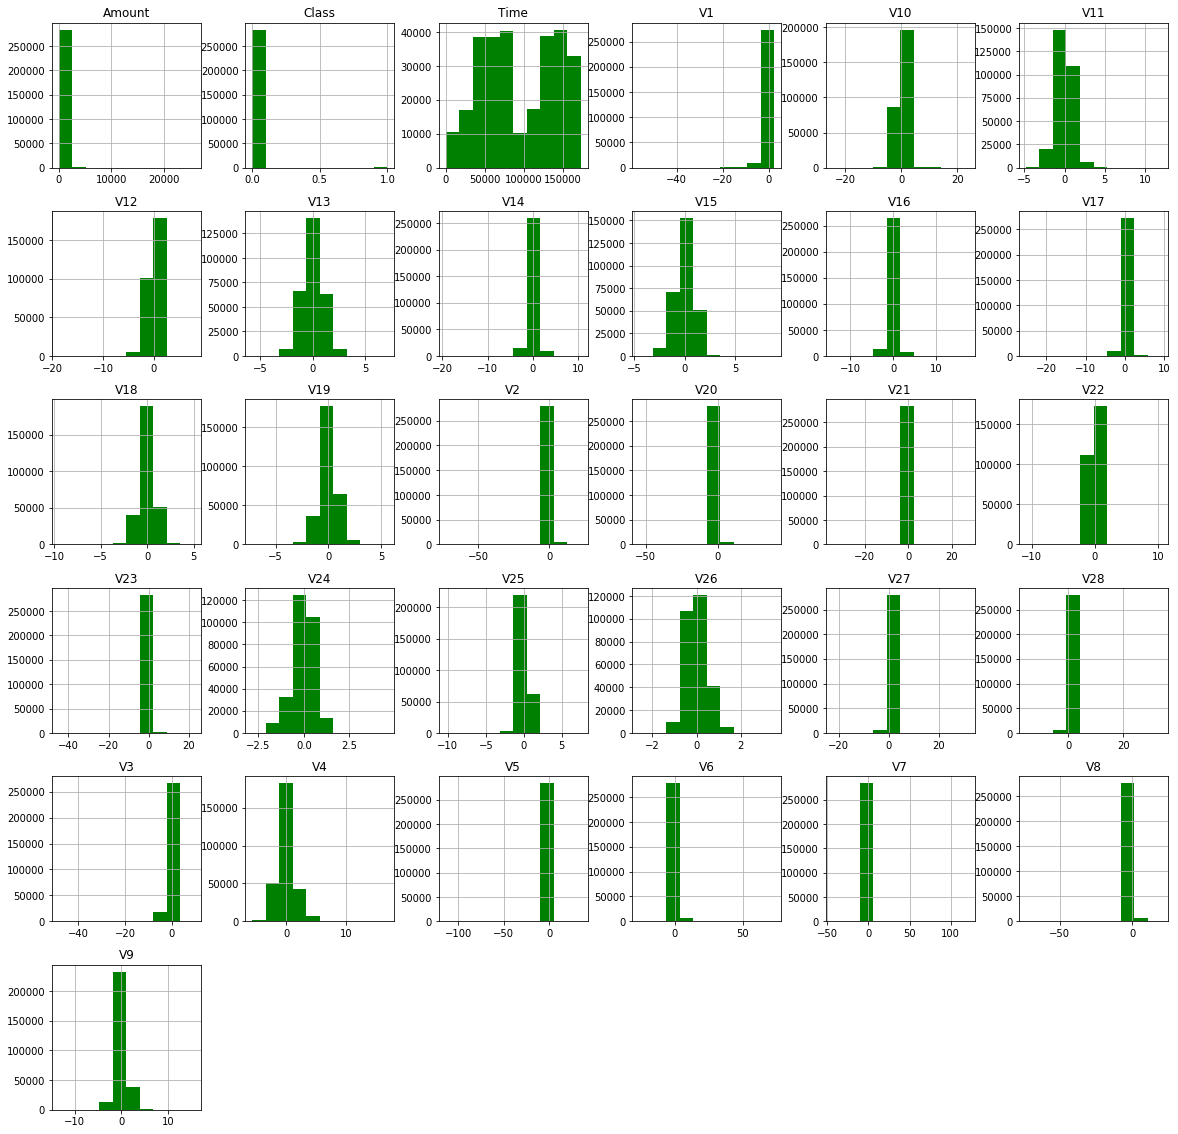

In [22]:
# Plot histograms of each parameter, shows the distrubtion of transactions for each column. V1-V28 centrred around 0. 
data.hist(figsize = (20, 20), color = "green")
plt.show()

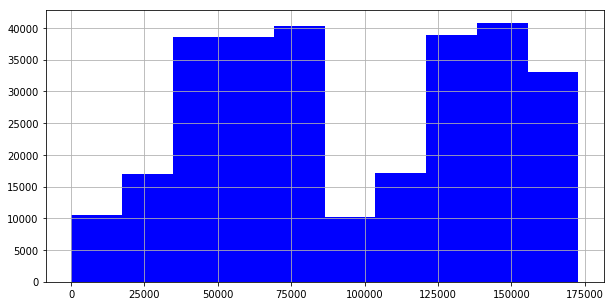

In [23]:
# Hist of time variable. " clear peaks indicating a higher requency of transactions, 2xday-night"
time = data.Time.hist(figsize = (10, 5), color = "blue")
plt.show(time)


In [24]:
print('Distribution of Fradulent and Valid transactions in the selected workiing set.')
print(data['Class'].value_counts()/len(data))



Distribution of Fradulent and Valid transactions in the selected workiing set.
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [25]:
#In this cell we count the number of fraudulent and legitement transactions.
#The outlier fraction is fraud/valid. 
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

#this is used as the contamination fraction, to tell algorithm how many fraud to predict.
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


# Heatmaps
Use heatmaps/correlation matrix to view any correaltion between columns 

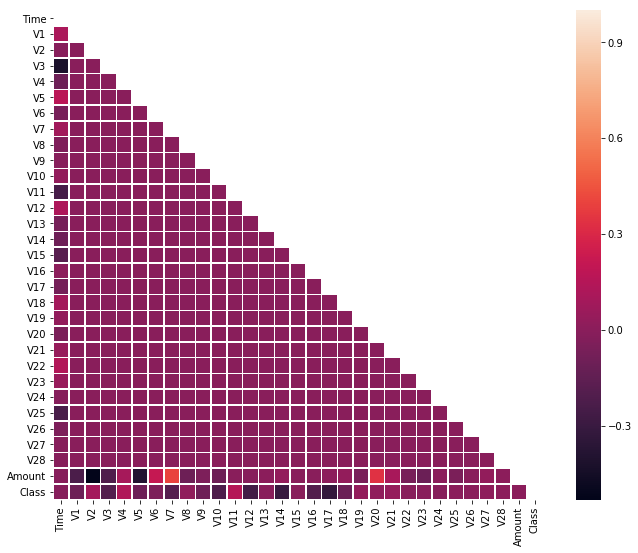

In [26]:
# Correlation matrix/heat map. 
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, square = True, linewidths= .5, mask=mask)
plt.show()

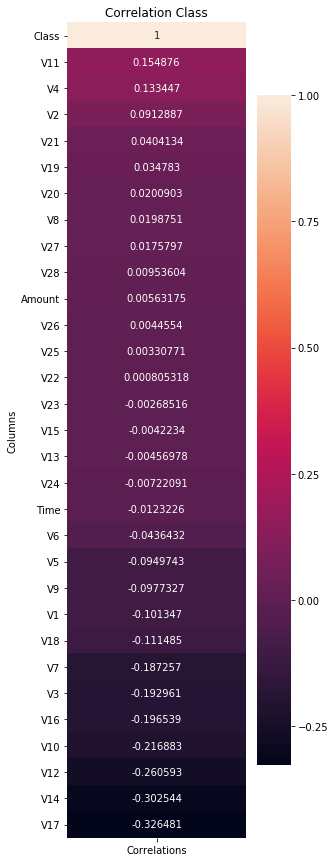

In [27]:
#show correltion between amount and class
corr = data.corrwith(data['Class']).reset_index()
corr.columns = ['Columns','Correlations']
corr = corr.set_index('Columns')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", )
plt.title("Correlation Class")
plt.show()

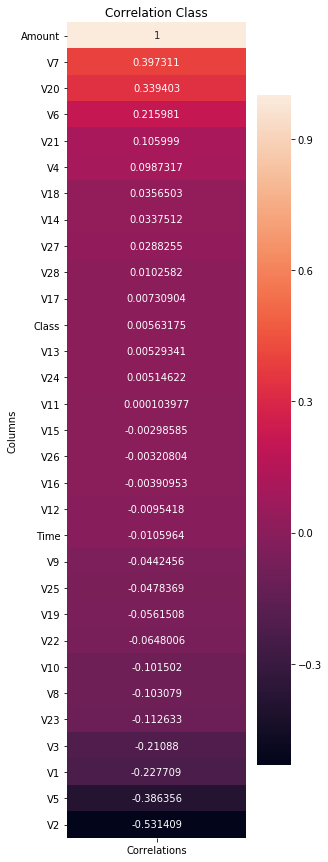

In [28]:
corr = data.corrwith(data['Amount']).reset_index()
corr.columns = ['Columns','Correlations']
corr = corr.set_index('Columns')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", )
plt.title("Correlation Class")
plt.show()

#due to size of dataset, running cell is time consuming. An imagine of results is below.
#sns.pairplot(data)
from IPython.display import Image
PATH = "D:\\alexa\\Pictures\\"
Image(filename = PATH + "ww.PNG", width=600, height=400)

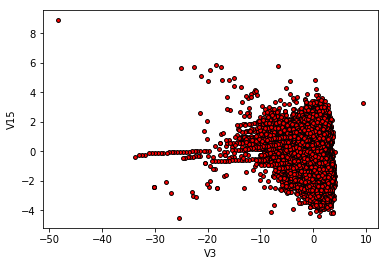

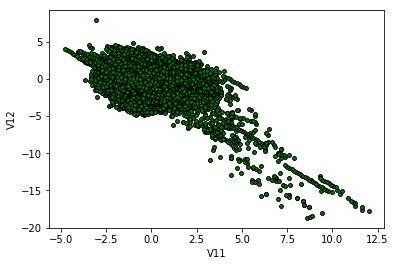

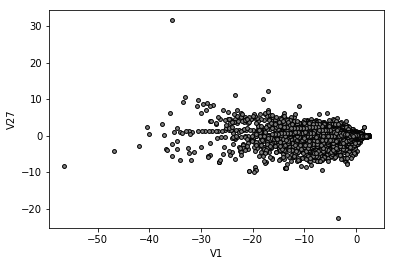

In [29]:
#plot scatter graphs to show clusters and outliers. 
data.plot(kind='scatter', x = 'V3', y = 'V15', c=['red'],s=15, edgecolors = 'black')
data.plot(kind='scatter', x = 'V11', y = 'V12', c=['green'],s=15, edgecolors = 'black')
data.plot(kind='scatter', x = 'V1', y = 'V27', c=['grey'],s=15, edgecolors = 'black')


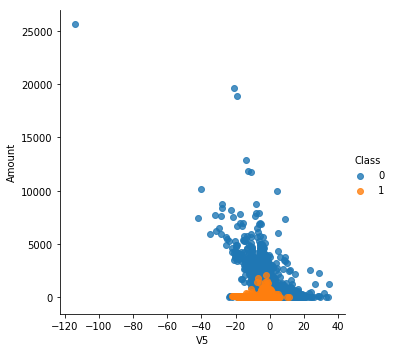

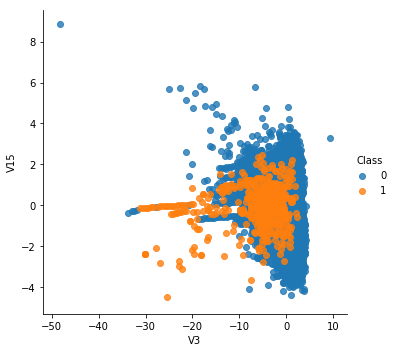

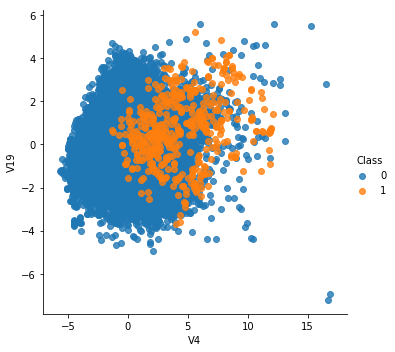

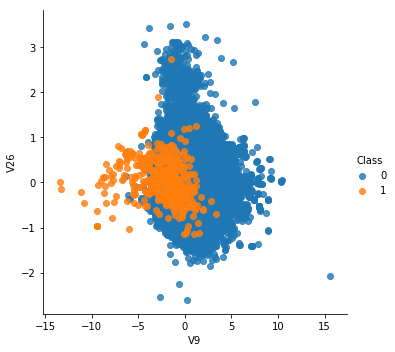

In [30]:
#At first glance there is clear outliers, but we must check if they are true anomalies. Add a hue of "class"
df = data
sns.lmplot(x = 'V5', y = 'Amount', data=df, fit_reg=False, hue='Class')
sns.lmplot(x = 'V3', y = 'V15', data=df, fit_reg=False, hue='Class' )
sns.lmplot(x = 'V4', y = 'V19', data=df, fit_reg=False, hue='Class' )
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False, hue='Class' )
#as we can see, most anomalies are hidden within the main clusters. 
#from plot one we can see the fraud amount is always low. the true outliers are indeed valid.

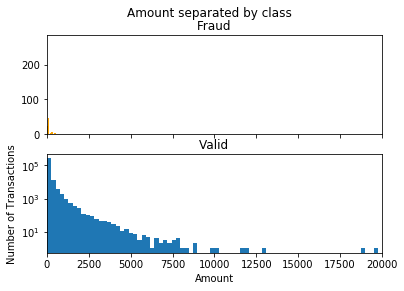

In [36]:
#furhter proving the fraud transactions are a low amount. 
f, (ax_fraud, ax_valid) = plt.subplots(2, 1, sharex=True)
bins = 100
f.suptitle('Amount separated by class')
ax_fraud.hist(Fraud.Amount, bins = bins, color = "orange")
ax_fraud.set_title('Fraud')
ax_valid.hist(Valid.Amount, bins = bins)
ax_valid.set_title('Valid')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

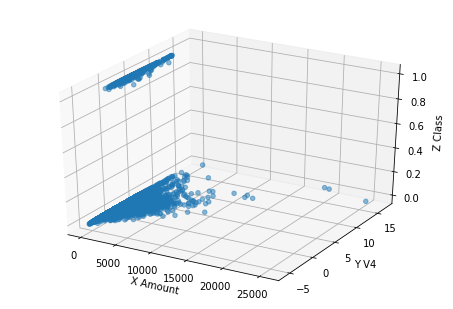

In [37]:
#3-D plotting is another sepraqtion method used to visually see anomalies. Once again, all fruad within main cluster
from mpl_toolkits.mplot3d import Axes3D

x = data.Amount
y = data.V4
z = data.Class

fig = plt.figure()
ax =Axes3D(fig)

ax.scatter(x, y, z, alpha = 0.5)
ax.set_xlabel('X Amount')
ax.set_ylabel('Y V4')
ax.set_zlabel('Z Class')
plt.show()


# Unupervised machine learning algorithms for anomaly detection
Below begins the implementation and evalutation of two unsupervised algorithms.

>Local outlier factor

>Isolation Forest 


In [38]:
#removing the labls for unsupervised and stroing them to compare results against. 
nolabel = data.columns.tolist()
nolabel = [c for c in nolabel if c not in ["Class"]]
labels = "Class"

X = data[nolabel]
Y = data[labels]

# Print shapes to see what X & Y contain. 
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [39]:
#creating a 50/50 test split for X & Y to keep results contstant. 
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=42)

In [40]:
#we can see the test and training are different sizes by one row, this will cause probelms when re-plotting the predicted labels.
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(142404, 30)
(142403, 30)
(142404,)
(142403,)


In [41]:
#removes row
X_test = X_test.iloc[1:,]
Y_test = Y_test.iloc[1:,]

In [42]:
#check to see if equal. 
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(142403, 30)
(142403, 30)
(142403,)
(142403,)


In [43]:
from sklearn.metrics import classification_report, accuracy_score,auc, roc_auc_score,f1_score,roc_curve
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.svm import OneClassSVM
import time

# Creating a function that returns results. We call this later
plt.figure(figsize=(9, 7))
#n_outliers = len(Fraud)

def alg_result():
    #algorithm output is -1 and 1.Change to binary for preidcted labels
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    #number of incorrect labels. Where y_pred does not equal the original label. 
    n_errors = (y_pred != Y_test).sum()

    #create the results and classififation report. 
    print('{}: {}'.format('Number of errors', n_errors))
    print("Accuracy score: ",accuracy_score(Y_test, y_pred))
    roc = roc_auc_score(Y_test, scores_pred)
    print("ROC_AUC_Score: ",roc)
    print(classification_report(Y_test, y_pred))
    

<Figure size 648x504 with 0 Axes>

In [44]:
#create the isolation algorithm, train it on X_train, set fraud prediciton amount(contamination)
#contanimation is how it knows how many to predict 
iso = IsolationForest(max_samples=len(X_train),
                                        contamination=outlier_fraction, random_state=1)

In [45]:
#time to train and test. 
#start run time
start = time. time()
scores_pred = - iso.fit(X_train).decision_function(X_test) #
y_pred = iso.predict(X_test)
alg_result()
end = time. time()
print("Runtime: ",end - start)

Number of errors: 294
Accuracy score:  0.9979354367534392
ROC_AUC_Score:  0.9533804151804647
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142158
          1       0.40      0.39      0.40       245

avg / total       1.00      1.00      1.00    142403

Runtime:  27.552321672439575


No handles with labels found to put in legend.


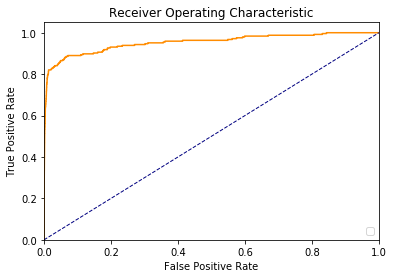

In [46]:
#create roc curve. 
fpr, tpr, thresholds = roc_curve(Y_test,scores_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange',)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Below we compare the original labels to predicted.

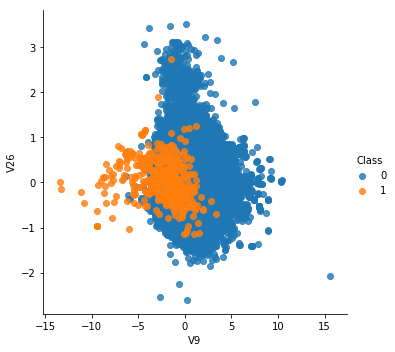

In [47]:
#original
df = data
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False, hue='Class' )

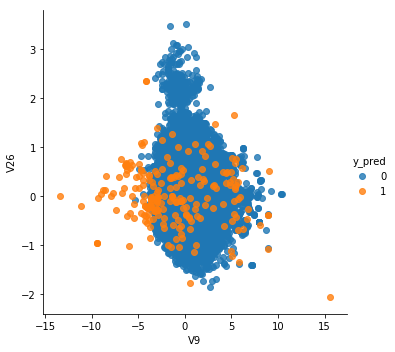

In [48]:
#predicted
X_test['y_pred']= y_pred
df = X_test
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False,hue='y_pred' )

# Local outlier factor

In [49]:
#initialize algorithm 
lof = LocalOutlierFactor(
        n_neighbors=10,
        contamination=outlier_fraction)


In [50]:
#train and test
start = time. time()
y_pred = lof.fit_predict(X_test)
scores_pred = -lof.negative_outlier_factor_ 
alg_result()
end = time. time()
print("Runtime: ",end - start)

Number of errors: 464
Accuracy score:  0.9967416416788972
ROC_AUC_Score:  0.7780362666317528
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142158
          1       0.06      0.06      0.06       245

avg / total       1.00      1.00      1.00    142403

Runtime:  3.2343244552612305


No handles with labels found to put in legend.


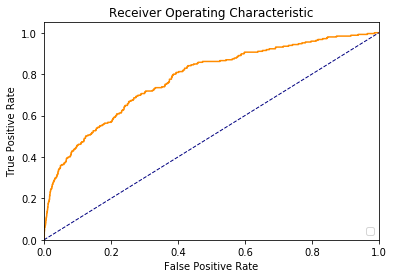

In [51]:
# once again create roc curve. 
fpr, tpr, thresholds = roc_curve(Y_test,scores_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange',)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

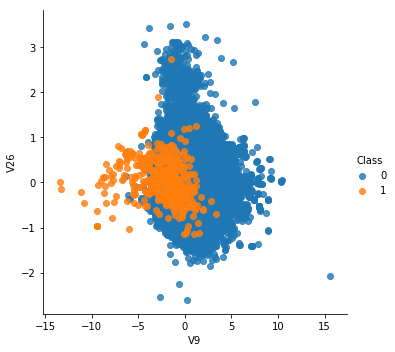

In [52]:
#original
df = data
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False, hue='Class' )

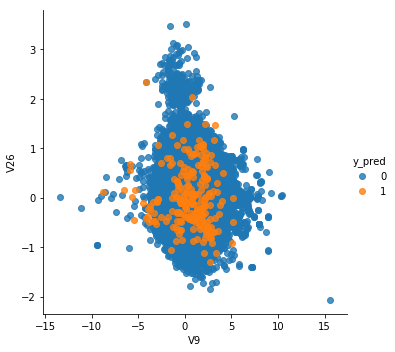

In [53]:
#predicted
X_test['y_pred']= y_pred
df = X_test
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False,hue='y_pred' )

# Semi-Supervised OC-SVM

In [ ]:
data2 = pd.read_csv('C:\\Users\\alexa\\Desktop\\4th Year\\Honours\\Credit Card Fraud\\creditcardfraud\\creditcard.csv')
print(data2.columns)

In [ ]:
X_train, X_test, = train_test_split(data2, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
X_test = X_test.iloc[1:,]

In [ ]:
nor_obs = X_train.loc[X_train.Class==0]    #Data frame with normal observation
ano_obs = X_train.loc[X_train.Class==1] 

In [ ]:
#X_train = X_train.drop('Class', 1)
X_test = X_test.drop('Class', 1)

In [ ]:

plt.figure(figsize=(9, 7))

def alg_result2():
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y_test).sum()

    # Run classification metrics
    
    print('{}: {}'.format('Number of errors', n_errors))
    print("Accuracy score: ",accuracy_score(Y_test, y_pred))
    #roc = roc_auc_score(Y_test, scores_pred)
    #print("ROC_AUC_Score: ",roc)
    print(classification_report(Y_test, y_pred))

In [ ]:
from sklearn import svm
# Setting the parameters for Once Class SVM

oneclass = svm.OneClassSVM(kernel='linear', gamma=0.001, nu=0.95)

In [ ]:
oneclass.fit(X_train)

In [ ]:
y_pred = oneclass.predict(X_test)
alg_result2()

In [ ]:
X_test['Y_test']= Y_test
df = X_test
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False, hue='Y_test' )

In [ ]:
X_test['Y_pred']= y_pred
df = X_test
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False, hue='Y_pred' )

# Supervised Random Forest

In [4]:
data3 = pd.read_csv('C:\\Users\\alexa\\Desktop\\4th Year\\Honours\\Credit Card Fraud\\creditcardfraud\\creditcard.csv')
print(data3.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
#removing the labls for unsupervised and stroing them to compare results against. 
nolabel = data3.columns.tolist()
nolabel = [c for c in nolabel if c not in ["Class"]]
labels = "Class"

X = data3[nolabel]
Y = data3[labels]

# Print shapes to see what X & Y contain. 
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=42)

In [10]:
X_test = X_test.iloc[1:,]
Y_test = Y_test.iloc[1:,]

In [13]:
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(9, 7))

def alg_result3():

    n_errors = (y_pred != Y_test).sum()

    # Run classification metrics
    
    print('{}: {}'.format('Number of errors', n_errors))
    print("Accuracy score: ",accuracy_score(Y_test, y_pred))
    #roc = roc_auc_score(Y_test, scores_pred)
    #print("ROC_AUC_Score: ",roc)
    print(classification_report(Y_test, y_pred))
    

<Figure size 648x504 with 0 Axes>

In [14]:
rf = RandomForestClassifier(max_depth=20, random_state=42)

In [16]:
start = time. time()
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
#scores_pred = rf.predict_proba(X_test)
alg_result3()
end = time. time()
print("Runtime: ",end - start)

Number of errors: 78
Accuracy score:  0.9994522587305043
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142158
          1       0.93      0.73      0.82       245

avg / total       1.00      1.00      1.00    142403

Runtime:  7.131901979446411


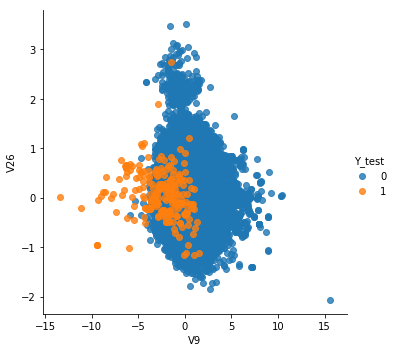

In [17]:
X_test['Y_test']= Y_test
df = X_test
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False, hue='Y_test' )


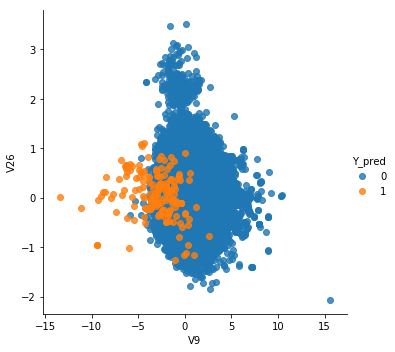

In [18]:
X_test['Y_pred']= y_pred
df = X_test
sns.lmplot(x = 'V9', y = 'V26', data=df, fit_reg=False, hue='Y_pred' )